#### Siqi Wang's Final Project for Python Coding for Public Policy Course


### Introduction

I'm utilizing the "Snapshot of NYC Public School Student Enrollment and Demographic Information" dataset on NYC Open Data provided by the NYC Department of Education (https://data.cityofnewyork.us/Education/2020-2021-Demographic-Snapshot-Borough/vquv-pjuh). The dataset covered school years from 2016-17 through 2020-21 and was last updated on November 18, 2021. 

Notes:  
    1. Enrollment is based on October 31 Audited Register for each school year, not the standard calendar year.  
    2. Economic Need Index (ENI) determines the likelihood that students at the school are in poverty, indicating a school's economic needs. For more information: https://www.schools.nyc.gov/docs/default-source/default-document-library/diversity-in-new-york-city-public-schools-english.

### Table of Contents
* [Data Preparation and Overview](#Data-Preparation-and-Overview)
* [ENI Yearly Trends Across NYC Boroughs](#ENI-Yearly-Trend-Across-NYC-Boroughs)
* [ENI Across Boroughs in School Year 2020-2021](#ENI-Across-Boroughs-in-School-Year-2020-2021)
* [Bar Graph of ENI in NYC Boroughs in School Year 2020-2021](#Bar-Graph-of-ENI-in-NYC-Boroughs-in-School-Year-2020-2021)
* [Spatial Distribution of ENI in NYC Boroughs in School Year 2020-2021](#Spatial-Distribution-of-ENI-in-NYC-Boroughs-in-School-Year-2020-2021)
* [Stacked Bar Graph of Students' Race and Ethnicity Demographic Distribution in NYC Public Schools in School Year 2020-2021](#Stacked-Bar-Graph-of-Students'-Race-and-Ethnicity-Demographic-Distribution-in-NYC-Public-Schools-in-School-Year-2020-2021)
* [Summary](#Summary)
* [Insights](#Insights)

### Data Preparation and Overview

In [36]:
#Import various python packages
import pandas as pd
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
#from plotnine import *

import matplotlib as mplib
import matplotlib.pyplot as plt # visualization package 1
import seaborn as sns           # visualization package 2

import geopandas as gpd         #  geospatial data package 1
import us                 #  geospatial data package 2
from shapely.geometry import Polygon

# so images get plotted in the notebook
%matplotlib inline
pio.renderers.default = "notebook_connected+pdf"

In [37]:
#Create a pandas dataframe of the NYC Public School Data
df= pd.read_csv('https://data.cityofnewyork.us/resource/vquv-pjuh.csv')

In [38]:
# There are 25 rows and 42 columns in the dataframe.
df.shape

(25, 42)

In [39]:
#Review the data types
df.dtypes

borough                           object
year                              object
total_enrollment                   int64
grade_3k_pk_half_day_full          int64
grade_k                            int64
grade_1                            int64
grade_2                            int64
grade_3                            int64
grade_4                            int64
grade_5                            int64
grade_6                            int64
grade_7                            int64
grade_8                            int64
grade_9                            int64
grade_10                           int64
grade_11                           int64
grade_12                           int64
female                             int64
female_1                         float64
male                               int64
male_1                           float64
asian                              int64
asian_1                          float64
black                              int64
black_1         

In [40]:
# See first 5 rows with head() function
df.head()

,borough,year,total_enrollment,grade_3k_pk_half_day_full,grade_k,grade_1,grade_2,grade_3,grade_4,grade_5,...,white_1,missing_race_ethnicity_data,missing_race_ethnicity_data_1,students_with_disabilities,students_with_disabilities_1,english_language_learners,english_language_learners_1,poverty,poverty_1,economic_need_index
0,Bronx,2016-17,241776,14825,17974,19579,19611,18943,18505,17824,...,0.043,725,0.003,55462,0.229,41129,0.170,197520,0.817,0.774
1,Bronx,2017-18,239955,14948,17812,18598,19008,18940,18535,18173,...,0.044,436,0.002,55719,0.232,41316,0.172,208334,0.868,0.857
2,Bronx,2018-19,236267,15105,17259,18071,17962,18318,18426,18026,...,0.043,461,0.002,55847,0.236,40055,0.170,203040,0.859,0.854
3,Bronx,2019-20,235448,17990,17103,17680,17598,17462,17981,18216,...,0.042,1367,0.006,54899,0.233,37509,0.159,202976,0.862,0.868
4,Bronx,2020-21,227224,14769,15468,16863,17031,17016,16906,17579,...,0.042,937,0.004,53144,0.234,37190,0.164,194432,0.856,0.858


In [41]:
# Extract the start and end years from the 'year' column
df['start_year'] = df['year'].str.extract('(\d{2})-\d{2}')[0]
df['end_year'] = df['year'].str.extract('\d{2}-(\d{2})')[0]

# Convert the extracted years to datetime format
df['start_year'] = pd.to_datetime(df['start_year'], format='%y')
df['end_year'] = pd.to_datetime(df['end_year'], format='%y')

### ENI Yearly Trend Across NYC Boroughs

From 2016-17 to 2017-18, the Economic Net Income (ENI) showed an increase across all boroughs. However, during the subsequent period from 2017-18 to 2019-20, the ENI remained relatively stable with a slight initial increase followed by a slight decrease. Finally, from 2019-20 to 2020-21, there was a decrease in the ENI.

In [62]:
fig=px.line(df,x="year",
            y="economic_need_index",
            color="borough",
            title="Yearly Trend in Student's ENI in Public Schools of NYC Boroughs",
            color_discrete_sequence=["grey"] * len(df['borough'].unique()))

# Updating x-axis label
fig.update_xaxes(title_text="Year")

# Updating y-axis label
fig.update_yaxes(title_text="Economic Need Index (ENI)")

# Center-aligning the title
fig.update_layout(title_x=0.48) 


fig.show()

### ENI Across Boroughs in School Year 2020-2021

In [43]:
# Filter data for the years 2020 and 2021
df_2020_2021 = df[(df['year'] >= '2020-01-01') & (df['year'] <= '2021-12-31')]
df_2020_2021

,borough,year,total_enrollment,grade_3k_pk_half_day_full,grade_k,grade_1,grade_2,grade_3,grade_4,grade_5,...,missing_race_ethnicity_data_1,students_with_disabilities,students_with_disabilities_1,english_language_learners,english_language_learners_1,poverty,poverty_1,economic_need_index,start_year,end_year
4,Bronx,2020-21,227224,14769,15468,16863,17031,17016,16906,17579,...,0.004,53144,0.234,37190,0.164,194432,0.856,0.858,2020-01-01,2021-01-01
9,Brooklyn,2020-21,330905,24119,22249,23447,23202,23974,23882,23747,...,0.007,65784,0.199,42661,0.129,243307,0.735,0.725,2020-01-01,2021-01-01
14,Manhattan,2020-21,173851,9870,10037,10249,10229,10413,10440,10395,...,0.011,37644,0.217,17041,0.098,114781,0.660,0.671,2020-01-01,2021-01-01
19,Queens,2020-21,294923,21013,20166,20946,20961,21154,21104,21463,...,0.006,52743,0.179,44123,0.150,206978,0.702,0.655,2020-01-01,2021-01-01
24,Staten Island,2020-21,67235,6210,4345,4532,4481,4680,4702,4795,...,0.005,17790,0.265,4708,0.070,39033,0.581,0.545,2020-01-01,2021-01-01


In [44]:
# Group the filtered data by borough and calculate the average ENI
avr_eni_20_21 = df_2020_2021.groupby('borough')['economic_need_index'].mean()
avr_eni_20_21.reset_index()

,borough,economic_need_index
0,Bronx,0.858
1,Brooklyn,0.725
2,Manhattan,0.671
3,Queens,0.655
4,Staten Island,0.545


#### Students in the public schools of Bronx had the highest average Economic Need Index (ENI) in school year 2020-2021.

#### The value was 0.858.

In [46]:
highest_average_eni_value = avr_eni_20_21.max()
highest_average_eni_value

0.858

#### The average ENI acorss five NYC boroughs was 0.691.

In [47]:
average_eni_all_boroughs = df_2020_2021['economic_need_index'].mean()
average_eni_all_boroughs

0.6908

### Bar Graph of ENI in NYC Boroughs in School Year 2020-2021

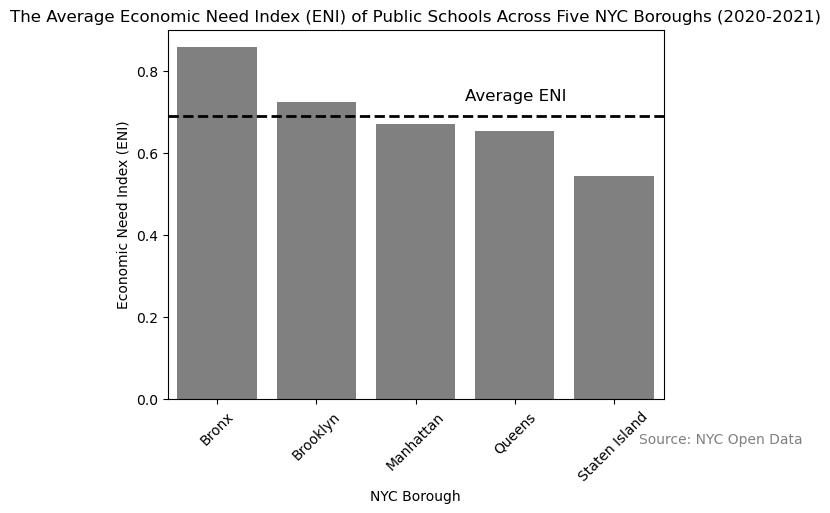

In [48]:
## Barplot function
# Note we can reference column names (in quotes) in the specified data:
# Change the color to a lovely green color
borough_ENI_20_21 = sns.barplot(x = 'borough', 
                             y = 'economic_need_index', 
                             data = df_2020_2021, 
                             color='#808080',
                               ci=None)

# Change the x-axis label
borough_ENI_20_21.set(xlabel ="NYC Borough", 
# Change the y-axis label
                    ylabel = "Economic Need Index (ENI)",
# Change the title
                    title = "The Average Economic Need Index (ENI) of Public Schools Across Five NYC Boroughs (2020-2021)")

# Add a horizontal line for reference
avr_ENI=0.6908
plt.axhline(y=avr_ENI, color='black', linewidth=2, linestyle='--')

# Add a title to the horizontal reference line
plt.text(2.5, avr_ENI + 0.05, 'Average ENI', color='black', fontsize=12, ha='left', va='center')

# Add data source annotation
plt.annotate('Source: NYC Open Data', xy=(0.95, -0.12), xycoords="axes fraction", fontsize=10, color='gray')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

In [49]:
Path = '/Users/wsq/Desktop/Python'

# Use geopandas to read in the .shp file
boroughs = gpd.read_file(Path + '/Borough Boundaries/geo_export_0684ba15-36fc-4141-9ad2-975c1abc7da6.shp')
type(boroughs)

geopandas.geodataframe.GeoDataFrame

In [50]:
boroughs.head()

,boro_code,boro_name,shape_area,shape_leng,geometry
0,5.0,Staten Island,1.623621e+09,325917.353950,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,2.0,Bronx,1.187175e+09,463179.772813,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
2,4.0,Queens,3.041419e+09,888199.730955,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."
3,1.0,Manhattan,6.365205e+08,357713.308660,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
4,3.0,Brooklyn,1.934138e+09,728148.532410,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."


In [51]:
boroughs.rename(columns={'boro_name': 'borough'}, inplace=True)
boroughs.head(3)

,boro_code,borough,shape_area,shape_leng,geometry
0,5.0,Staten Island,1.623621e+09,325917.353950,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,2.0,Bronx,1.187175e+09,463179.772813,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
2,4.0,Queens,3.041419e+09,888199.730955,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."


In [52]:
df_2020_2021 = pd.merge(boroughs, df_2020_2021, on='borough', how = 'inner')
df_2020_2021.head(5)

,boro_code,borough,shape_area,shape_leng,geometry,year,total_enrollment,grade_3k_pk_half_day_full,grade_k,grade_1,...,missing_race_ethnicity_data_1,students_with_disabilities,students_with_disabilities_1,english_language_learners,english_language_learners_1,poverty,poverty_1,economic_need_index,start_year,end_year
0,5.0,Staten Island,1.623621e+09,325917.353950,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",2020-21,67235,6210,4345,4532,...,0.005,17790,0.265,4708,0.070,39033,0.581,0.545,2020-01-01,2021-01-01
1,2.0,Bronx,1.187175e+09,463179.772813,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...",2020-21,227224,14769,15468,16863,...,0.004,53144,0.234,37190,0.164,194432,0.856,0.858,2020-01-01,2021-01-01
2,4.0,Queens,3.041419e+09,888199.730955,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...",2020-21,294923,21013,20166,20946,...,0.006,52743,0.179,44123,0.150,206978,0.702,0.655,2020-01-01,2021-01-01
3,1.0,Manhattan,6.365205e+08,357713.308660,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",2020-21,173851,9870,10037,10249,...,0.011,37644,0.217,17041,0.098,114781,0.660,0.671,2020-01-01,2021-01-01
4,3.0,Brooklyn,1.934138e+09,728148.532410,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...",2020-21,330905,24119,22249,23447,...,0.007,65784,0.199,42661,0.129,243307,0.735,0.725,2020-01-01,2021-01-01


### Spatial Distribution of ENI in NYC Boroughs in School Year 2020-2021

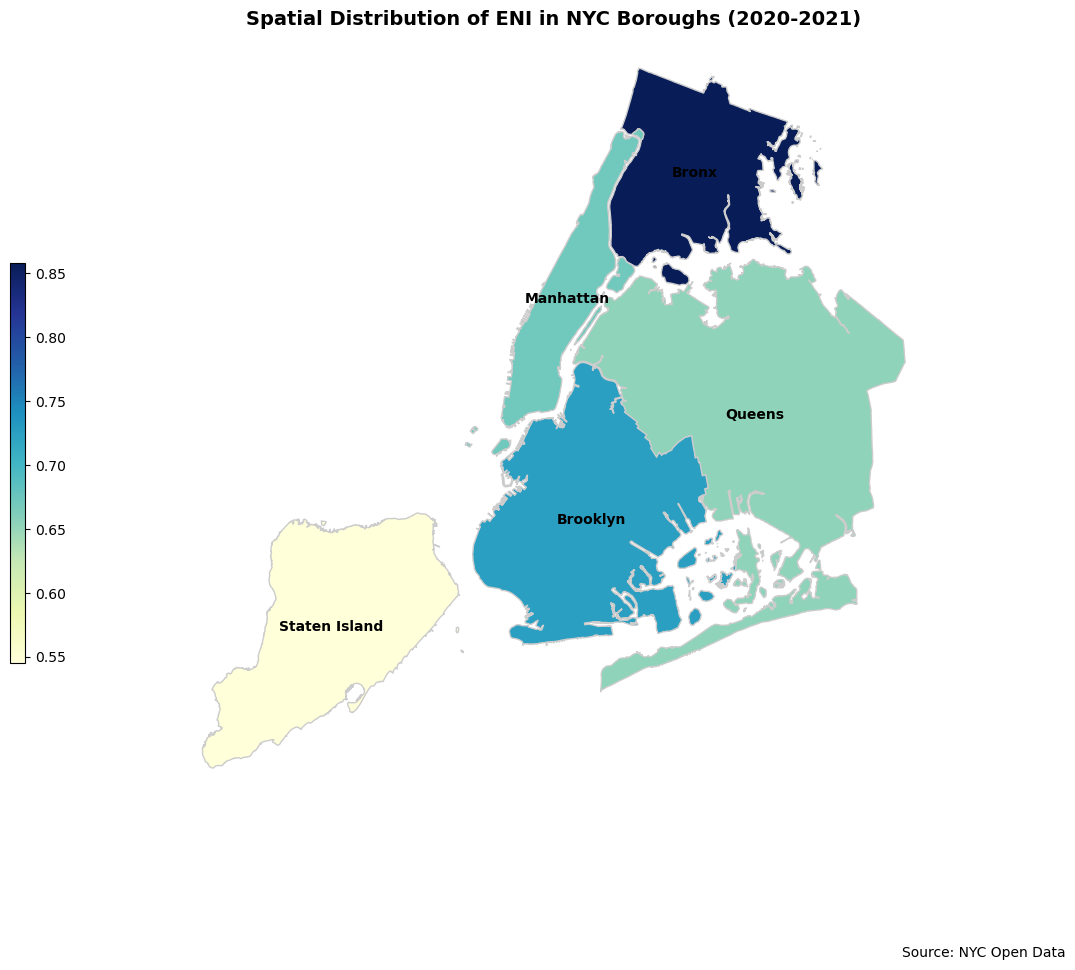

In [53]:
# Indicate the variable that should be used for the colors for the heat map
col = 'economic_need_index'

# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 10))

# Create the heat map of the NYC
df_2020_2021.plot(column = col, ax = ax, edgecolor='0.8', linewidth=1, cmap='YlGnBu')

# Add borough labels
for idx, row in df_2020_2021.iterrows():
    ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y, row['borough'],
            fontsize=10, ha='center', va='center', color='black',fontweight='bold')

# Remove the axis
ax.axis('off')

# Customize appearance
ax.set_title('Spatial Distribution of ENI in NYC Boroughs (2020-2021)',
             fontsize=14, fontweight='bold')

# add a data source 
# xy are measured in percent of axes length, from bottom left of graph:
plt.annotate('Source: NYC Open Data', xy=(0.95,-0.20), xycoords="axes fraction")

# identify the max and min number of ENI
vmin = df_2020_2021[col].min()
vmax = df_2020_2021[col].max()

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap='YlGnBu')

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

### Stacked Bar Graph of Students' Race and Ethnicity Demographic Distribution in NYC Public Schools in School Year 2020-2021

In [54]:
df_2020_2021 = df_2020_2021.sort_values(by='economic_need_index', ascending=False)

In [55]:
rceth_20_21 = df_2020_2021[['borough','asian_1', 'black_1', 'hispanic_1', 'native_american_1', 'white_1', 'multi_racial_1','missing_race_ethnicity_data_1']].copy()
# Format ethnicity columns as percentages
ethnicity_columns = ['asian_1', 'black_1', 'hispanic_1','native_american_1', 'white_1', 'multi_racial_1','missing_race_ethnicity_data_1']
# Display the updated DataFrame
rceth_20_21.head()

,borough,asian_1,black_1,hispanic_1,native_american_1,white_1,multi_racial_1,missing_race_ethnicity_data_1
1,Bronx,0.050,0.268,0.620,0.010,0.042,0.006,0.004
4,Brooklyn,0.169,0.338,0.283,0.009,0.179,0.014,0.007
3,Manhattan,0.119,0.226,0.446,0.008,0.163,0.027,0.011
2,Queens,0.285,0.169,0.385,0.020,0.122,0.013,0.006
0,Staten Island,0.125,0.129,0.297,0.005,0.421,0.018,0.005


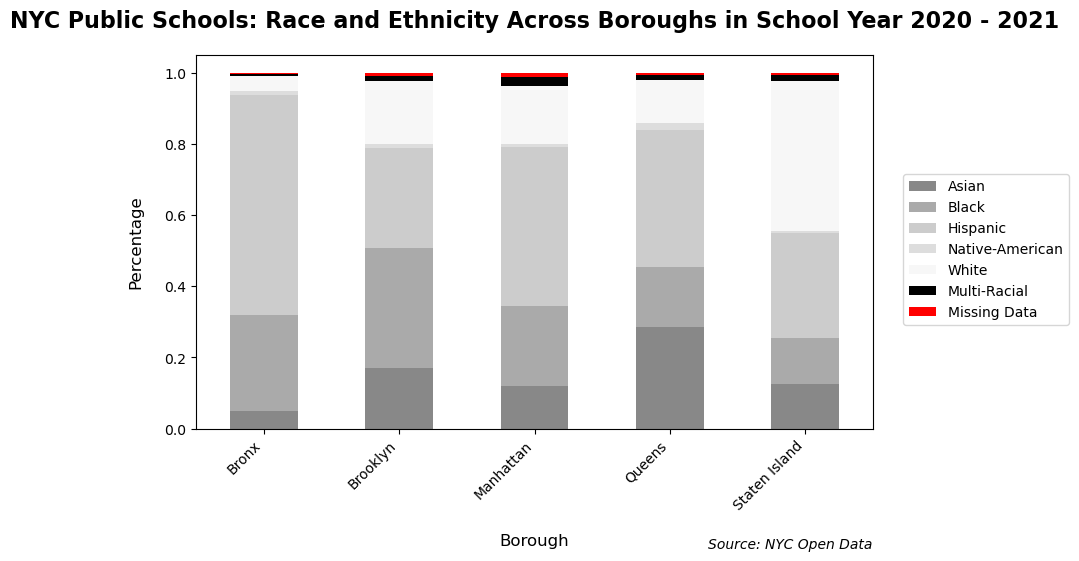

In [60]:
import matplotlib.pyplot as plt

# Data visualization: Comparing Race and Ethnicity in NYC Public Schools Across Boroughs

# Prepare data
colors = ['#888888', '#AAAAAA', '#CCCCCC', '#DDDDDD', '#F7F7F7', 'black', 'red']
borough_data = rceth_20_21.set_index('borough')  # Assuming rceth_20_21 contains relevant data

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
borough_data.plot(kind='bar', stacked=True, color=colors, ax=ax)

# Customize appearance
ax.set_xlabel('Borough', fontsize=12, labelpad=15)
ax.set_ylabel('Percentage', fontsize=12, labelpad=15)
ax.set_title('NYC Public Schools: Race and Ethnicity Across Boroughs in School Year 2020 - 2021',
             fontsize=16, fontweight='bold', pad=20)

# Add data source annotation
data_source = 'Source: NYC Open Data'
ax.annotate(data_source, xy=(0.999, -0.32), xycoords="axes fraction",
            fontsize=10, fontstyle='italic', ha='right')

# Improve x-axis labels readability
ax.set_xticklabels(borough_data.index, rotation=45, ha='right')

# Customize legend
legend_labels = ['Asian', 'Black', 'Hispanic', 'Native-American', 'White', 'Multi-Racial', 'Missing Data']
ax.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.3, 0.7))

# Adjust plot layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


### Summary

In the school year 2020-2021, students from public schools in the Bronx had the highest average Economic Need Index (ENI). This indicates a higher level of economic need or disadvantage among the student population in the Bronx compared to other NYC boroughs.

Students with minority backgrounds made up the majority proportion of the student body in public schools in the Bronx. This suggests a diverse student population with a significant representation of racial and ethnic minorities in Bronx public schools.

### Insights

1. This project does not establish any causal relationships. To understand the underlying causes or factors driving the observed patterns, further research focusing on causal relationships would be necessary.  
2. Future research should address potential data gaps and explore reasons for incomplete or unreported race and ethnicity information. This is crucial for obtaining a comprehensive and accurate understanding of the student population.  
3. Investigating multi-racial data could provide valuable insights to support students in their education, which might not be fully represented by traditional categories. 